# Python to Quant


## Choice library when get data

Consider library list 

**Pandas Datareader**

> https://pypi.org/project/pandas-datareader/
- 2k start

**yfinance**

>https://pypi.org/project/yfinance/
- 8k star

I choice `yfinace`, cuz it is more descirbed from get data and more star of git

## Get Data and Draw Chart

start : 2022-01-01 00:00:00,end: 2023-02-28 00:00:00
msf df's columns : Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


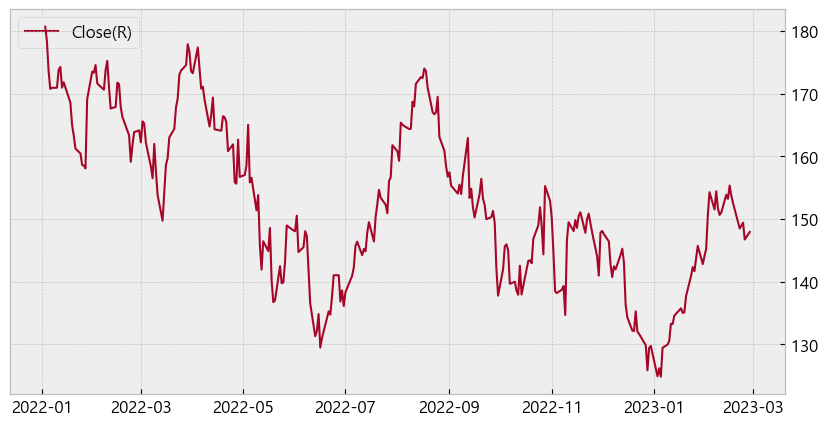

In [1]:
import os, sys
import pandas as pd
import numpy as np
from datetime import datetime
sys.path.append('/mylib')
from method import *

df = get_yf_df('AAPL', datetime(2022,1,1), datetime(2023,2,28))
df.head(3)
draw_chart(dataframe=df, right="Close")
# draw_chart(dataframe=df, right="Open")
# draw_chart(dataframe=df, right="Volume")

## Set Strategy

### RSI, MACD 

by startegy set Position

In [2]:
macd = get_trend_of_macd_df(df)
add_calcualte_signal_df(macd, 'macd_oscillator', buy=0, sell = 0)

rsi = get_trend_of_rsi(df)
add_calcualte_signal_df(rsi, 'rsi', buy=40, sell = 60)

macd output_df : Index(['Close', 'macd', 'macd_signal', 'macd_oscillator'], dtype='object')
Index(['Close', 'macd', 'macd_signal', 'macd_oscillator', 'trade', 'position',
       'position_chart'],
      dtype='object')
rsi output_df : Index(['Close', 'rsi'], dtype='object')


,Close,rsi,trade,position,position_chart
Date,,,,,
2022-01-03 00:00:00-05:00,180.683868,NaN,zero,,0
2022-01-04 00:00:00-05:00,178.390701,NaN,zero,zero_wait,0
2022-01-05 00:00:00-05:00,173.645523,NaN,zero,zero_wait,0
2022-01-06 00:00:00-05:00,170.746811,NaN,zero,zero_wait,0
2022-01-07 00:00:00-05:00,170.915573,NaN,zero,zero_wait,0
...,...,...,...,...,...
2023-02-21 00:00:00-05:00,148.479996,52.58,zero,zero_wait,0
2023-02-22 00:00:00-05:00,148.910004,53.32,zero,zero_wait,0
2023-02-23 00:00:00-05:00,149.399994,54.19,zero,zero_wait,0


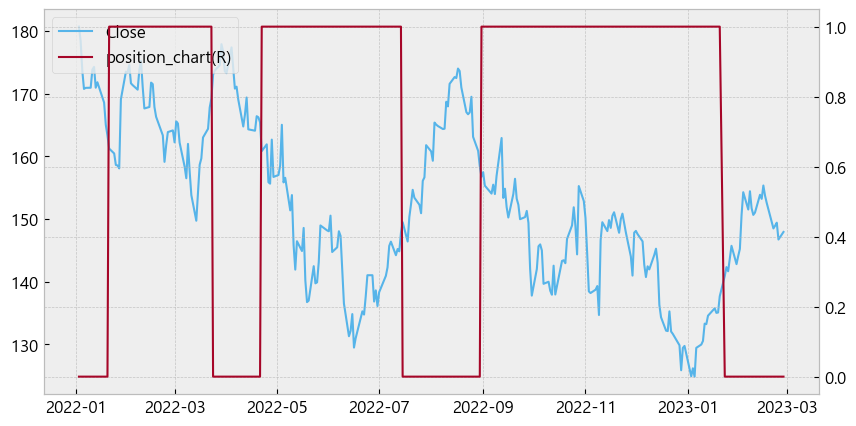

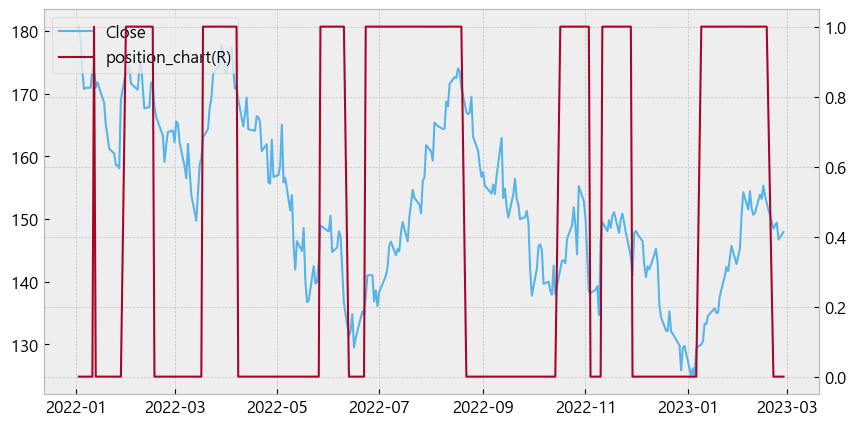

In [3]:
draw_chart(rsi, left='Close', right = 'position_chart')

draw_chart(macd, left = 'Close', right ='position_chart')


## Calculate Backtesting




In [4]:
get_evaluate_column(macd)
get_evaluate_column(rsi)


CAGR: 8.56%
Accumulated return: 9.54%
Average return: 1.64%
Benchmark return : -14.79%
Number of trades: 8
Number of win: 3
Hit ratio: 37.50%
Investment period: 1.1yrs
Sharpe ratio: 0.22
MDD: -17.34%
Benchmark MDD: -28.08%




CAGR: -10.54%
Accumulated return: -10.59%
Average return: -3.37%
Benchmark return : -12.61%
Number of trades: 3
Number of win: 1
Hit ratio: 33.33%
Investment period: 1.0yrs
Sharpe ratio: -0.25
MDD: -27.92%
Benchmark MDD: -30.91%






,Close,rsi,trade,position,position_chart,signal_price,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd,exs_rtn_daily
Date,,,,,,,,,,,,,
2022-01-21 00:00:00-05:00,161.226685,15.52,have,buy,1,161.226685,1.000000,1.000000,1.000000,0.00,1.0000,0.8923,-0.000027
2022-01-24 00:00:00-05:00,160.442429,15.10,have,have_wait,1,160.442429,1.000000,0.995136,0.995136,-0.49,0.9951,0.8880,-0.004892
2022-01-25 00:00:00-05:00,158.615829,14.14,have,have_wait,1,158.615829,1.000000,0.988615,0.983806,-1.62,0.9838,0.8779,-0.011412
2022-01-26 00:00:00-05:00,158.526505,14.09,have,have_wait,1,158.526505,1.000000,0.999437,0.983252,-1.67,0.9833,0.8774,-0.000591
2022-01-27 00:00:00-05:00,158.059921,13.83,have,have_wait,1,158.059921,1.000000,0.997057,0.980358,-1.96,0.9804,0.8748,-0.002971
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-17 00:00:00-05:00,135.732758,53.20,have,have_wait,1,135.732758,1.000000,1.008756,0.862231,-13.78,0.7838,0.7512,0.008729
2023-01-18 00:00:00-05:00,135.003876,51.76,have,have_wait,1,135.003876,1.000000,0.994630,0.857601,-14.24,0.7796,0.7472,-0.005397
2023-01-19 00:00:00-05:00,135.063782,51.87,have,have_wait,1,135.063782,1.000000,1.000444,0.857981,-14.20,0.7799,0.7475,0.000416
